Pythonには多数の可視化パッケージがあります。
以下のパッケージを使って、ヒストグラム（度数分布）を作成する方法を比較します。

# 比較するライブラリ

- `matplotlib`
- `seaborn`
- `altair`
- `plotly`
- `hvplot`

In [ ]:
# 前提とするデータ
import pandas as pd
import numpy as np

values = np.random.normal(loc=0, scale=1, size=1000)
df = pd.DataFrame({"value": values})

# Matplotlib

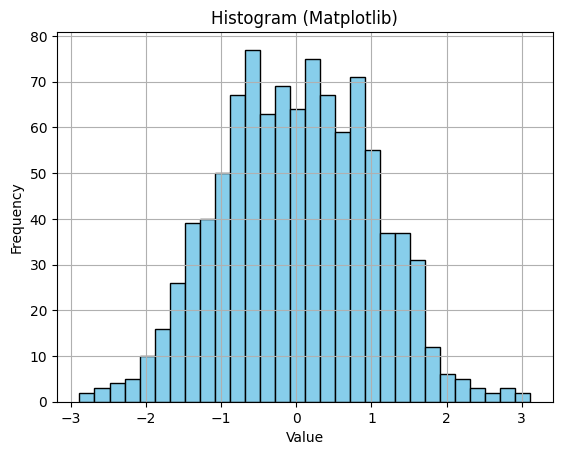

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["value"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram (Matplotlib)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig("python-histogram-matplotlib.png", dpi=300, bbox_inches="tight")

# showする前にsavefigが必要
plt.show()
plt.close()

# Seaborn

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# Altair

`altair`は`Vega-Lite`をベースにした可視化パッケージです。
宣言的に書くことができ可読性が高いです。
ただし、コードが長くなってしまいます。
また、5000行以上のデータは制限があります。

In [ ]:
import altair as alt

chart = (
    alt.Chart(df)
    .mark_bar()
    .encode(alt.X("value", bin=alt.Bin(maxbins=30)), y="count()")
    .properties(title="Histogram (Altair)")
)
chart.show()

chart.save("python-histogram-altair.png")
# chart.save("python-histogram-altair.svg")
# chart.save("python-histogram-altair.html")

alt.Chart(...)

# Plotly

`plotly`はインタラクティブ操作が可能なパッケージです。
`plotly.express`というサブパッケージを使うのがお手軽です。
カスタムしたい場合は`plotly.graph_object`を直接利用します。

In [26]:
import plotly.express as px

fig = px.histogram(df, x="value", nbins=30, title="Histogram (Plotly)")
# fig.write_image("python-histogram-plotly.png")
fig.show()

# hvPlot

`hvPlot`は「HoloViews」という可視化パッケージのエコシステム・プロジェクトの一部です。
`df.plot()`と同じ感覚で利用できるのが特徴です。
自動でインタラクティブ化され、`Streamlit`や`Panel`でダッシュボード化できます。
また、コード量が最小です。

In [ ]:
import hvplot.pandas

df.hvplot.hist(y="value", bins=30, title="Histogram (hvPlot)")

:Histogram   [value]   (Count)